In [1]:
import os
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [4]:
jk = os.listdir("C:/Users/indus/Documents/Indusha Images/JK")

In [5]:
mic = os.listdir("C:/Users/indus/Documents/Indusha Images/Mic")

In [6]:
indra = os.listdir("C:/Users/indus/Documents/Indusha Images/Indra")

In [7]:
limit = 120 #no of images in each folder

jk_imgs = [None]*limit
j = 0
for i in jk:
    if(j<limit):
        jk_imgs[j] = imread("C:/Users/indus/Documents/Indusha Images/JK/"+i)
        j+=1
    else:
        break
        

In [8]:
mic_imgs = [None]*limit
j = 0
for i in mic:
    if(j<limit):
        mic_imgs[j] = imread("C:/Users/indus/Documents/Indusha Images/Mic/"+i)
        j+=1
    else:
        break
        

In [9]:
indra_imgs = [None]*limit
j = 0
for i in indra:
    if(j<limit):
        indra_imgs[j] = imread("C:/Users/indus/Documents/Indusha Images/Indra/"+i)
        j+=1
    else:
        break
        

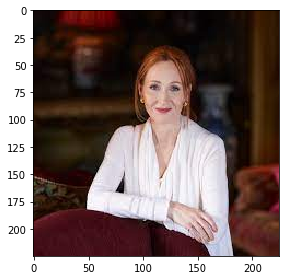

In [10]:
imshow(jk_imgs[3])

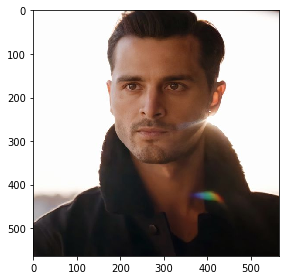

In [11]:
imshow(mic_imgs[1])

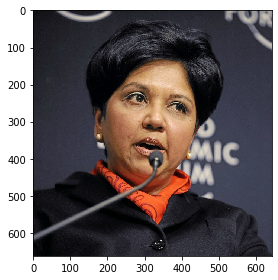

In [12]:
 imshow(indra_imgs[2])

In [13]:
jk_gray = [None]*limit
j = 0
for i in jk:
    if(j<limit):
        jk_gray[j] = rgb2gray(jk_imgs[j][:,:,:3])
        j+=1
    else:
        break

In [14]:
indra_gray = [None]*limit
j = 0
for i in indra:
    if(j<limit):
        indra_gray[j] = rgb2gray(indra_imgs[j])
        j+=1
    else:
        break

In [15]:
mic_gray = [None]*limit
j = 0
for i in mic:
    if(j<limit):
        mic_gray[j] = rgb2gray(mic_imgs[j])
        j+=1
    else:
        break

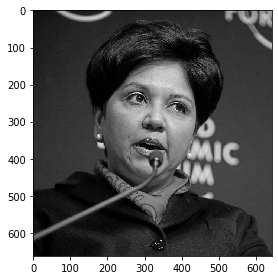

In [16]:
 imshow(indra_gray[2])

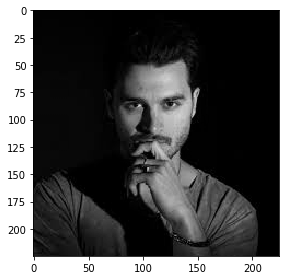

In [17]:
imshow(mic_gray[6])

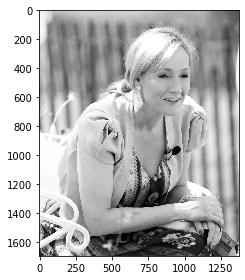

In [18]:
imshow(jk_gray[4])

In [19]:
jk_gray[6].shape

(1200, 1200)

In [20]:
mic_gray[4].shape

(695, 1042)

In [21]:
indra_gray[6].shape

(1536, 1536)

In [22]:
for j in range(10):
    jk = jk_gray[j]
    jk_gray[j] = resize(jk,(512,512))

In [23]:
for j in range(10):
    mic = mic_gray[j]
    mic_gray[j] = resize(mic,(512,512))

In [24]:
for j in range(10):
    indra = indra_gray[j]
    indra_gray[j] = resize(indra,(512,512))

(512, 512)

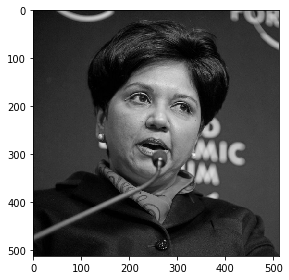

In [25]:
imshow(indra_gray[2])
img_size = indra_gray[2].shape
img_size

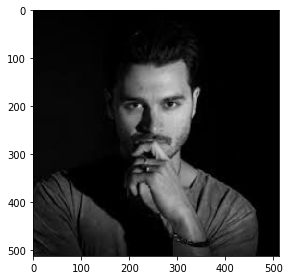

In [26]:
imshow(mic_gray[6])

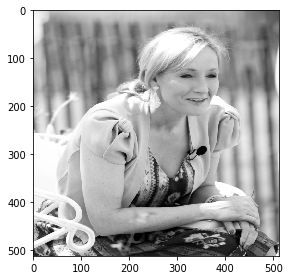

In [27]:
imshow(jk_gray[4])

In [28]:
lenjk = len(jk_gray)
lenjk

120

In [29]:
lenmic = len(mic_gray)
lenmic

120

In [30]:
lenindra = len(indra_gray)
lenindra

120

In [31]:
flatten_jk = img_size[0]*img_size[1]
flatten_jk

262144

In [32]:
for i in range(lenjk):
    jk_gray[i] = np.ndarray.flatten(jk_gray[i]).reshape(flatten_jk,1)

ValueError: cannot reshape array of size 2324489 into shape (262144,1)

In [ ]:
jk_gray = np.dstack(jk_gray)

In [ ]:
jk_gray = np.rollaxis(jk_gray, axis =2, start =0)

In [ ]:
jk_gray.shape

In [ ]:
jk_gray = jk_gray.reshape(lenjk,flatten_jk)
jk_gray.shape

In [ ]:
jk_data = pd.DataFrame(jk_gray)

In [ ]:
jk_data

In [ ]:
jk_data["label"] = "JK Rowling"

In [ ]:
flatten_mic = img_size[0]*img_size[1]
flatten_mic

In [ ]:
for i in range(lenmic):
    mic_gray[i] = np.ndarray.flatten(mic_gray[i]).reshape(flatten_mic,1)

In [ ]:
mic_gray = np.dstack(mic_gray)

In [ ]:
mic_gray = np.rollaxis(mic_gray, axis =2, start =0)

In [ ]:
mic_gray.shape

In [ ]:
mic_gray = mic_gray.reshape(lenmic,flatten_mic)
mic_gray.shape

In [ ]:
mic_data = pd.DataFrame(mic_gray)

In [ ]:
mic_data["label"] = "Michael Malarkey"

In [ ]:
mic_data

In [ ]:
flatten_indra = img_size[0]*img_size[1]
flatten_indra

In [ ]:
for i in range(lenindra):
    indra_gray[i] = np.ndarray.flatten(indra_gray[i]).reshape(flatten_indra,1)

In [ ]:
indra_gray = np.dstack(indra_gray)

In [ ]:
indra_gray = np.rollaxis(indra_gray, axis =2, start =0)

In [ ]:
indra_gray.shape

In [ ]:
indra_gray = indra_gray.reshape(lenindra,flatten_indra)
indra_gray.shape

In [ ]:
indra_data = pd.DataFrame(indra_gray)

In [ ]:
indra_data["label"] = "Indra Nooye"

In [ ]:
indra_data

In [ ]:
ds1 = pd.concat([jk_data, mic_data])

In [ ]:
ds = pd.concat([ds1,indra_data])

In [ ]:
ds

### Shuffling Data

In [ ]:
from sklearn.utils import shuffle
ds = shuffle(ds).reset_index()

In [ ]:
ds

### Index Removal

In [ ]:
ds = ds.drop(['index'],axis=1)

In [ ]:
ds

### Assigning Independent and Dependant

In [ ]:
x = ds.values[:,:-1]

In [ ]:
y =ds.values[:,-1]

In [ ]:
x,y

### Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
x_train

In [ ]:
y_test

### SVM

Here we are going to perform support vector classification, hence it's SVC

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(x_train,y_train)

### SVM Image Prediction

In [ ]:
y_pred= clf.predict(x_test)  

In [ ]:
y_pred

### Prediction Visualization

In [ ]:
for i in (np.random.randint(0,60,35)):
    pred_imgs = np.reshape(x_test[i](512,512)).astype(np.float64)

### Metrics

In [ ]:
from sklearn import metrics

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [ ]:
accuracy

### Error Analysis

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)